In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution approximating the shape of the bottle as a cylinder

In [92]:
def surface_area_of_cylinder(r, h):
    return 2 * np.pi * r * h + 2 * np.pi * r**2

def volume_of_cylinder(r, h):
    return np.pi * r**2 * h

In [93]:
# assume a 20 oz water bottle https://www.berlinpackaging.com/20-oz-clear-pet-plastic-water-bottles-4691b26-b/
# let mass of bottle and cylinder be the same

R = 6.91/2 # cm

h = 20.1 # cm

rho_w = 1.0 # g/cm^3

mass_of_water_bottle = 23 # g
rho_c = mass_of_water_bottle / surface_area_of_cylinder(R, h) # g/m^2
rho_c

0.04497972618954244

In [94]:
def COM_of_water_cylinder(l_over_h):
    numerator = np.pi * rho_c * R * (1/l_over_h) * (h + R) + 0.5 * np.pi * rho_w * R**2 * l_over_h * h
    denominator = 2 * np.pi * R * rho_c * h * (1/l_over_h) + 2 * np.pi * R**2 * rho_c * (1/l_over_h) + np.pi * R**2 * rho_w * h
    return numerator / denominator

/tmp/ipykernel_16203/2774539497.py:2: RuntimeWarning: divide by zero encountered in divide
  numerator = np.pi * rho_c * R * (1/l_over_h) * (h + R) + 0.5 * np.pi * rho_w * R**2 * l_over_h * h
/tmp/ipykernel_16203/2774539497.py:3: RuntimeWarning: divide by zero encountered in divide
  denominator = 2 * np.pi * R * rho_c * h * (1/l_over_h) + 2 * np.pi * R**2 * rho_c * (1/l_over_h) + np.pi * R**2 * rho_w * h
/tmp/ipykernel_16203/2774539497.py:4: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


0.1468118079612362

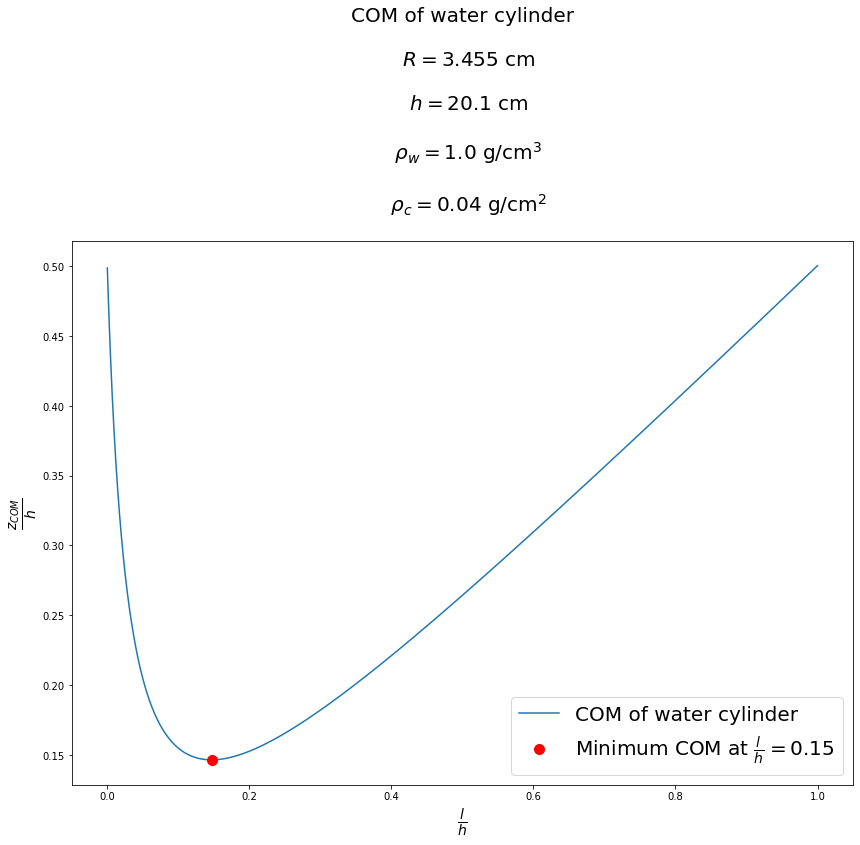

In [95]:
fig, ax = plt.subplots(figsize=(14, 10))

l_over_h = np.linspace(0, 1, 10000)
ax.plot(l_over_h, COM_of_water_cylinder(l_over_h), label='COM of water cylinder')

# find min COM, remove nan
min_COM = np.nanmin(COM_of_water_cylinder(l_over_h))
min_COM_l_over_h = l_over_h[np.nanargmin(COM_of_water_cylinder(l_over_h))]

ax.plot(min_COM_l_over_h, min_COM, 'ro', label=f'Minimum COM at $\\frac{{l}}{{h}} = {min_COM_l_over_h:.2f}$', markersize=10)


ax.set_xlabel(r'$\frac{l}{h}$', fontsize=20)
ax.set_ylabel(r'$\frac{z_{COM}}{h}$', fontsize=20)

ax.set_title(f'''COM of water cylinder
            \n  $R = {R}$ cm
            \n  $h = {h}$ cm
            \n  $\\rho_w = {rho_w:}$ g/cm$^3$
            \n  $\\rho_c = {rho_c:.2f}$ g/cm$^2$
             ''', fontsize=20)

ax.legend(fontsize=20)

min_COM